In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [51]:
data = pd.read_csv('predictive_maintenance.csv')
data #see whether dataset loaded

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [52]:
data.isnull().sum() #checking nulls

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [53]:
data.duplicated().sum() #checking duplicates

0

C:\Users\rmkav\AppData\Local\Temp\ipykernel_13856\2499133536.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)


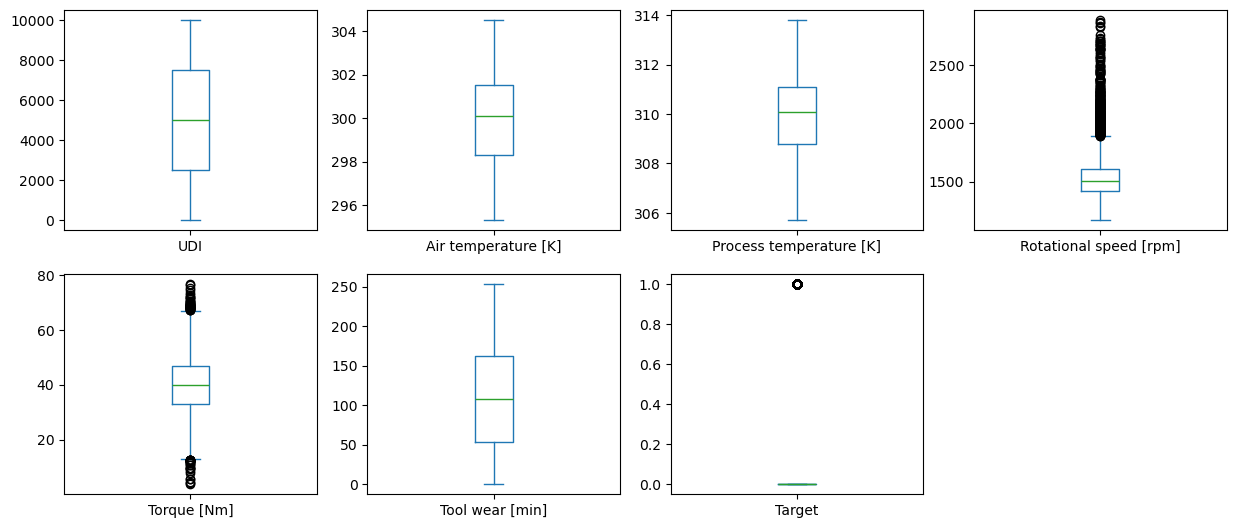

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
data.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)
plt.show()

In [55]:
# Counting outliers of Rotational speed column
# Calculate Q1, Q3, and IQR
Q1 = data["Rotational speed [rpm]"].quantile(0.25)
Q3 = data["Rotational speed [rpm]"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers based on the bounds
outliers = data[(data["Rotational speed [rpm]"] < lower_bound) | (data["Rotational speed [rpm]"] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Output the number of outliers
number_of_outliers


418

In [56]:
# Counting outliers of Torque [Nm] column
# Calculate Q1, Q3, and IQR
Q1 = data["Torque [Nm]"].quantile(0.25)
Q3 = data["Torque [Nm]"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers based on the bounds
outliers = data[(data["Torque [Nm]"] < lower_bound) | (data["Torque [Nm]"] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Output the number of outliers
number_of_outliers

69

In [57]:
copied_df = data.copy() #copying dataset to maipulate the data
copied_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [58]:
# Check unique values in the column
unique_values = copied_df['Failure Type'].unique()
print(unique_values)

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [59]:
unique_values = copied_df['Target'].unique()
print(unique_values)

[0 1]


In [60]:
unique_values = copied_df['Type'].unique()
print(unique_values)

['M' 'L' 'H']


In [61]:
# train test validate spliting data
from sklearn.model_selection import train_test_split

# feature column and target column
X = copied_df.drop('Failure Type', axis=1)
y = copied_df['Failure Type']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Verify the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (6000, 9)
Validation set shape: (2000, 9)
Test set shape: (2000, 9)


In [62]:
X_train

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8588,8589,L55768,L,297.3,307.8,1385,44.4,169,0
3178,3179,M18038,M,300.2,309.4,1329,53.6,186,0
5200,5201,L52380,L,303.8,312.8,1416,58.7,156,0
8889,8890,M23749,M,297.7,308.8,2089,19.1,111,0
5789,5790,M20649,M,301.8,311.5,1416,49.0,136,0
...,...,...,...,...,...,...,...,...,...
8871,8872,M23731,M,297.9,309.1,1558,39.2,59,0
9826,9827,L57006,L,298.4,309.2,1345,52.7,196,0
5268,5269,L52448,L,303.4,312.9,1389,54.1,109,0
9666,9667,M24526,M,299.1,310.3,1838,24.0,235,0


In [63]:
X_test

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6252,6253,L53432,L,300.8,310.3,1538,36.1,198,0
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1
1731,1732,M16591,M,298.3,307.9,1485,42.0,117,0
4742,4743,L51922,L,303.3,311.3,1592,33.7,14,0
4521,4522,L51701,L,302.4,310.4,1865,23.9,129,0
...,...,...,...,...,...,...,...,...,...
6412,6413,L53592,L,300.4,310.0,1423,44.2,189,0
8285,8286,L55465,L,298.9,310.6,1387,52.7,2,0
7853,7854,L55033,L,300.3,311.7,1317,56.5,7,0
1095,1096,L48275,L,296.9,307.5,2721,9.3,18,1


In [64]:
X_val

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
3188,3189,M18048,M,300.1,309.2,1438,51.0,211,0
8293,8294,M23153,M,298.9,310.4,1533,44.4,24,0
1710,1711,L48890,L,298.2,307.8,1530,35.9,68,0
7510,7511,L54690,L,300.5,311.8,1524,38.9,214,1
1461,1462,L48641,L,298.9,310.2,1491,45.1,101,0
...,...,...,...,...,...,...,...,...,...
2834,2835,L50014,L,300.3,309.1,1368,46.0,171,0
449,450,L47629,L,297.6,308.7,1622,37.9,79,0
6686,6687,L53866,L,301.7,311.0,1715,24.8,17,0
3561,3562,L50741,L,301.7,310.6,1486,38.5,78,0


In [65]:
y_train

8588    No Failure
3178    No Failure
5200    No Failure
8889    No Failure
5789    No Failure
           ...    
8871    No Failure
9826    No Failure
5268    No Failure
9666    No Failure
6090    No Failure
Name: Failure Type, Length: 6000, dtype: object

In [66]:
y_test

6252       No Failure
4684       No Failure
1731       No Failure
4742       No Failure
4521       No Failure
            ...      
6412       No Failure
8285       No Failure
7853       No Failure
1095    Power Failure
6929       No Failure
Name: Failure Type, Length: 2000, dtype: object

In [67]:
y_val

3188           No Failure
8293           No Failure
1710           No Failure
7510    Tool Wear Failure
1461           No Failure
              ...        
2834           No Failure
449            No Failure
6686           No Failure
3561           No Failure
9595           No Failure
Name: Failure Type, Length: 2000, dtype: object

**Need to check on outliers**

X_train

C:\Users\rmkav\AppData\Local\Temp\ipykernel_13856\2695874865.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)


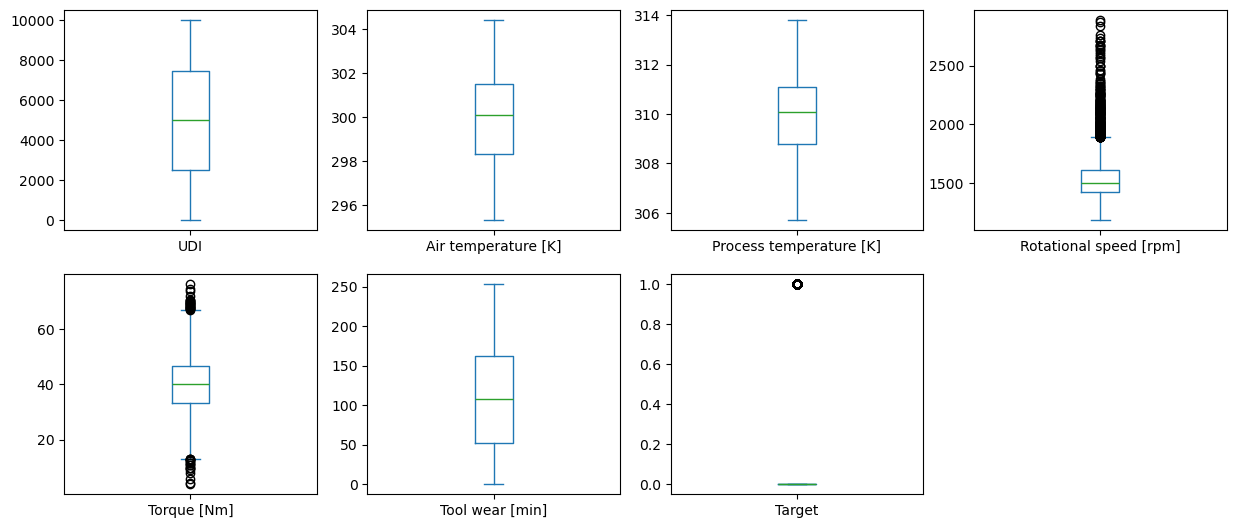

In [68]:
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)
plt.show()

In [69]:
# Counting outliers of Rotational speed column
# Calculate Q1, Q3, and IQR
Q1 = X_train["Rotational speed [rpm]"].quantile(0.25)
Q3 = X_train["Rotational speed [rpm]"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers based on the bounds
outliers = X_train[(X_train["Rotational speed [rpm]"] < lower_bound) | (X_train["Rotational speed [rpm]"] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Output the number of outliers
number_of_outliers

284

In [70]:
# Counting outliers of Torque [Nm] column
# Calculate Q1, Q3, and IQR
Q1 = X_train["Torque [Nm]"].quantile(0.25)
Q3 = X_train["Torque [Nm]"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers based on the bounds
outliers = X_train[(X_train["Torque [Nm]"] < lower_bound) | (X_train["Torque [Nm]"] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Output the number of outliers
number_of_outliers

43

In [71]:
unique_values = X_train['Rotational speed [rpm]'].unique()
unique_values

array([1385, 1329, 1416, 2089, 1633, 1498, 1438, 1411, 1691, 1373, 1369,
       2016, 1430, 1410, 1706, 1304, 1446, 1488, 1561, 1523, 1499, 1454,
       1623, 1347, 1413, 1400, 1818, 1490, 1431, 1664, 1393, 1541, 1420,
       1518, 1622, 1642, 1447, 2051, 1482, 1335, 1481, 1437, 1572, 1644,
       1669, 1336, 1320, 1301, 1550, 1585, 1506, 1412, 1457, 1421, 1699,
       1877, 1602, 1640, 1466, 1374, 1439, 1892, 1881, 1382, 1574, 1233,
       1610, 1270, 1419, 1366, 1496, 1651, 1609, 1403, 1546, 1465, 1584,
       1469, 1375, 1535, 1485, 1619, 1476, 1537, 1645, 1360, 1749, 1621,
       1754, 1395, 1356, 1315, 1484, 1493, 1545, 1593, 1378, 1589, 1528,
       1514, 1460, 1637, 1422, 1614, 1324, 1433, 1740, 1817, 1470, 1486,
       1627, 1709, 1735, 1464, 1641, 1844, 1417, 1582, 1492, 1666, 1429,
       1407, 1281, 1548, 1389, 1692, 1453, 1330, 1442, 1379, 1504, 1638,
       1370, 1569, 1916, 2245, 1570, 1387, 1463, 2329, 1531, 1501, 1665,
       1715, 1405, 1898, 1565, 1615, 1830, 1834, 18

C:\Users\rmkav\AppData\Local\Temp\ipykernel_13856\2695874865.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)


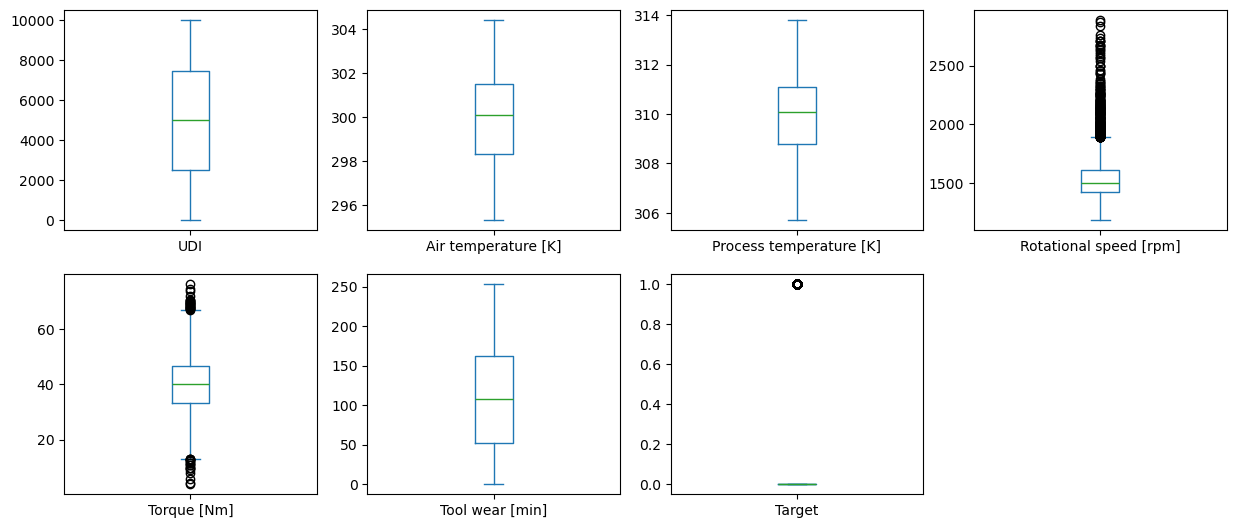

In [72]:
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)
plt.show()

Encoding Failure types

In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
#cheking what were assigned
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original values to encoded values:", mapping)

Mapping of original values to encoded values: {'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


In [75]:
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
y_test

array([1, 1, 1, ..., 1, 3, 1])

In [76]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original values to encoded values:", mapping)

Mapping of original values to encoded values: {'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


In [77]:
label_encoder = LabelEncoder()
y_val = label_encoder.fit_transform(y_val)
y_val

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original values to encoded values:", mapping)

Mapping of original values to encoded values: {'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


Encoding Type

In [79]:
label_encoder = LabelEncoder()
X_train['Type'] = label_encoder.fit_transform(X_train['Type'])
X_train

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8588,8589,L55768,1,297.3,307.8,1385,44.4,169,0
3178,3179,M18038,2,300.2,309.4,1329,53.6,186,0
5200,5201,L52380,1,303.8,312.8,1416,58.7,156,0
8889,8890,M23749,2,297.7,308.8,2089,19.1,111,0
5789,5790,M20649,2,301.8,311.5,1416,49.0,136,0
...,...,...,...,...,...,...,...,...,...
8871,8872,M23731,2,297.9,309.1,1558,39.2,59,0
9826,9827,L57006,1,298.4,309.2,1345,52.7,196,0
5268,5269,L52448,1,303.4,312.9,1389,54.1,109,0
9666,9667,M24526,2,299.1,310.3,1838,24.0,235,0


In [80]:
X_train = X_train.drop('Product ID', axis=1)
X_train

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8588,8589,1,297.3,307.8,1385,44.4,169,0
3178,3179,2,300.2,309.4,1329,53.6,186,0
5200,5201,1,303.8,312.8,1416,58.7,156,0
8889,8890,2,297.7,308.8,2089,19.1,111,0
5789,5790,2,301.8,311.5,1416,49.0,136,0
...,...,...,...,...,...,...,...,...
8871,8872,2,297.9,309.1,1558,39.2,59,0
9826,9827,1,298.4,309.2,1345,52.7,196,0
5268,5269,1,303.4,312.9,1389,54.1,109,0
9666,9667,2,299.1,310.3,1838,24.0,235,0


In [81]:
X_train = X_train.drop('UDI', axis=1)
X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8588,1,297.3,307.8,1385,44.4,169,0
3178,2,300.2,309.4,1329,53.6,186,0
5200,1,303.8,312.8,1416,58.7,156,0
8889,2,297.7,308.8,2089,19.1,111,0
5789,2,301.8,311.5,1416,49.0,136,0
...,...,...,...,...,...,...,...
8871,2,297.9,309.1,1558,39.2,59,0
9826,1,298.4,309.2,1345,52.7,196,0
5268,1,303.4,312.9,1389,54.1,109,0
9666,2,299.1,310.3,1838,24.0,235,0


In [82]:
X_test = X_test.drop('Product ID', axis=1)
X_test

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6252,6253,L,300.8,310.3,1538,36.1,198,0
4684,4685,M,303.6,311.8,1421,44.8,101,1
1731,1732,M,298.3,307.9,1485,42.0,117,0
4742,4743,L,303.3,311.3,1592,33.7,14,0
4521,4522,L,302.4,310.4,1865,23.9,129,0
...,...,...,...,...,...,...,...,...
6412,6413,L,300.4,310.0,1423,44.2,189,0
8285,8286,L,298.9,310.6,1387,52.7,2,0
7853,7854,L,300.3,311.7,1317,56.5,7,0
1095,1096,L,296.9,307.5,2721,9.3,18,1


In [83]:
X_test = X_test.drop('UDI', axis=1)
X_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6252,L,300.8,310.3,1538,36.1,198,0
4684,M,303.6,311.8,1421,44.8,101,1
1731,M,298.3,307.9,1485,42.0,117,0
4742,L,303.3,311.3,1592,33.7,14,0
4521,L,302.4,310.4,1865,23.9,129,0
...,...,...,...,...,...,...,...
6412,L,300.4,310.0,1423,44.2,189,0
8285,L,298.9,310.6,1387,52.7,2,0
7853,L,300.3,311.7,1317,56.5,7,0
1095,L,296.9,307.5,2721,9.3,18,1


In [84]:
X_val = X_val.drop('Product ID', axis=1)
X_val = X_val.drop('UDI', axis=1)
X_val

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
3188,M,300.1,309.2,1438,51.0,211,0
8293,M,298.9,310.4,1533,44.4,24,0
1710,L,298.2,307.8,1530,35.9,68,0
7510,L,300.5,311.8,1524,38.9,214,1
1461,L,298.9,310.2,1491,45.1,101,0
...,...,...,...,...,...,...,...
2834,L,300.3,309.1,1368,46.0,171,0
449,L,297.6,308.7,1622,37.9,79,0
6686,L,301.7,311.0,1715,24.8,17,0
3561,L,301.7,310.6,1486,38.5,78,0


In [85]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original values to encoded values:", mapping)

Mapping of original values to encoded values: {'H': 0, 'L': 1, 'M': 2}


In [86]:
label_encoder = LabelEncoder()
X_test['Type'] = label_encoder.fit_transform(X_test['Type'])
X_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6252,1,300.8,310.3,1538,36.1,198,0
4684,2,303.6,311.8,1421,44.8,101,1
1731,2,298.3,307.9,1485,42.0,117,0
4742,1,303.3,311.3,1592,33.7,14,0
4521,1,302.4,310.4,1865,23.9,129,0
...,...,...,...,...,...,...,...
6412,1,300.4,310.0,1423,44.2,189,0
8285,1,298.9,310.6,1387,52.7,2,0
7853,1,300.3,311.7,1317,56.5,7,0
1095,1,296.9,307.5,2721,9.3,18,1


In [87]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original values to encoded values:", mapping)

Mapping of original values to encoded values: {'H': 0, 'L': 1, 'M': 2}


In [88]:
label_encoder = LabelEncoder()
X_val['Type'] = label_encoder.fit_transform(X_val['Type'])
X_val

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
3188,2,300.1,309.2,1438,51.0,211,0
8293,2,298.9,310.4,1533,44.4,24,0
1710,1,298.2,307.8,1530,35.9,68,0
7510,1,300.5,311.8,1524,38.9,214,1
1461,1,298.9,310.2,1491,45.1,101,0
...,...,...,...,...,...,...,...
2834,1,300.3,309.1,1368,46.0,171,0
449,1,297.6,308.7,1622,37.9,79,0
6686,1,301.7,311.0,1715,24.8,17,0
3561,1,301.7,310.6,1486,38.5,78,0


In [89]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original values to encoded values:", mapping)

Mapping of original values to encoded values: {'H': 0, 'L': 1, 'M': 2}


In [90]:
#importing SVM from sklearn
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Support Vector Classifier (SVC)


In [91]:
# handle outliers of the Torque column in X_train
# Calculate Q1, Q3, and IQR
Q1 = X_train["Rotational speed [rpm]"].quantile(0.25)
Q3 = X_train["Rotational speed [rpm]"].quantile(0.75)

IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers based on the bounds
outliers = X_train[(X_train["Rotational speed [rpm]"] < lower_bound) | (X_train["Rotational speed [rpm]"] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

#Output the number of outliers
# number_of_outliers

# Display the values of the outliers
outliers_values = outliers["Rotational speed [rpm]"].values

# Output the outliers' values
outliers_values
# upper_bound


# Cap the values exceeding the upper bound
# X_train.loc[X_train["Rotational speed [rpm]"] > upper_bound, "Rotational speed [rpm]"] = upper_bound

# # Cap the values below the lower bound
# X_train.loc[X_train["Rotational speed [rpm]"] < lower_bound, "Rotational speed [rpm]"] = lower_bound

# X_train

array([2089, 2016, 2051, 1892, 1916, 2245, 2329, 1898, 2009, 1954, 2579,
       1995, 2032, 2833, 2204, 2267, 1924, 1924, 2024, 1953, 1889, 1949,
       2179, 2044, 1989, 2709, 1889, 1937, 2113, 1920, 1948, 2022, 1968,
       1988, 1896, 2384, 2012, 1960, 2305, 2049, 1910, 1958, 1981, 2372,
       1917, 2000, 2102, 1981, 1969, 2218, 2250, 2329, 2011, 2174, 1905,
       1988, 1927, 1916, 2289, 1962, 1953, 2092, 1985, 2271, 2074, 2636,
       2354, 2643, 1903, 2186, 1910, 2144, 2496, 1928, 1931, 2028, 1981,
       1946, 1953, 2194, 2231, 1967, 2051, 1907, 2065, 2248, 1951, 1922,
       1965, 1923, 2119, 2083, 2706, 2437, 1892, 2158, 2197, 2084, 2161,
       1989, 2297, 1922, 2270, 2137, 1911, 1893, 2093, 2312, 1958, 1981,
       1924, 2659, 1924, 2678, 1967, 1927, 1991, 1908, 1924, 2564, 2098,
       1972, 1926, 2034, 1995, 2262, 1903, 2001, 2116, 1951, 1911, 2097,
       1922, 2323, 2090, 2183, 2293, 2174, 1964, 1918, 1989, 1981, 2595,
       2007, 1950, 2886, 2465, 2102, 1959, 2567, 21

In [92]:
# Cap the values exceeding the upper bound
X_train.loc[X_train["Rotational speed [rpm]"] > upper_bound, "Rotational speed [rpm]"] = upper_bound

# Cap the values below the lower bound
X_train.loc[X_train["Rotational speed [rpm]"] < lower_bound, "Rotational speed [rpm]"] = lower_bound

X_train

C:\Users\rmkav\AppData\Local\Temp\ipykernel_13856\4223888647.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1887.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train["Rotational speed [rpm]"] > upper_bound, "Rotational speed [rpm]"] = upper_bound


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8588,1,297.3,307.8,1385.000,44.4,169,0
3178,2,300.2,309.4,1329.000,53.6,186,0
5200,1,303.8,312.8,1416.000,58.7,156,0
8889,2,297.7,308.8,1887.125,19.1,111,0
5789,2,301.8,311.5,1416.000,49.0,136,0
...,...,...,...,...,...,...,...
8871,2,297.9,309.1,1558.000,39.2,59,0
9826,1,298.4,309.2,1345.000,52.7,196,0
5268,1,303.4,312.9,1389.000,54.1,109,0
9666,2,299.1,310.3,1838.000,24.0,235,0


In [ ]:
# X_test = X_test.drop('Rotational speed [rpm]', axis=1)
# X_train = X_train.drop('Rotational speed [rpm]', axis=1)
# X_val = X_val.drop('Rotational speed [rpm]', axis=1)

C:\Users\rmkav\AppData\Local\Temp\ipykernel_13856\2695874865.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)


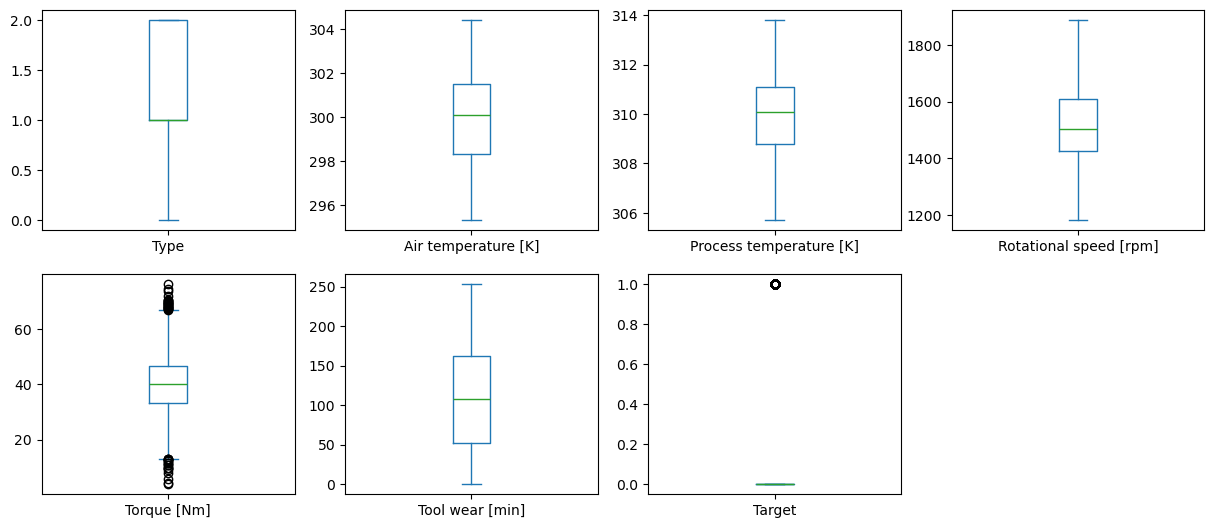

In [93]:
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)
plt.show()

In [95]:
# handle outliers of the Torque column in X_train
# Calculate Q1, Q3, and IQR
Q1 = X_train["Torque [Nm]"].quantile(0.25)
Q3 = X_train["Torque [Nm]"].quantile(0.75)

IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers based on the bounds
outliers = X_train[(X_train["Torque [Nm]"] < lower_bound) | (X_train["Torque [Nm]"] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Output the number of outliers
# number_of_outliers

# Display the values of the outliers
outliers_values = outliers["Torque [Nm]"].values

# Output the outliers' values
# outliers_values


# Cap the values exceeding the upper bound
X_train.loc[X_train["Torque [Nm]"] > upper_bound, "Torque [Nm]"] = upper_bound

# Cap the values below the lower bound
X_train.loc[X_train["Torque [Nm]"] < lower_bound, "Torque [Nm]"] = lower_bound

X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8588,1,297.3,307.8,1385.000,44.4,169,0
3178,2,300.2,309.4,1329.000,53.6,186,0
5200,1,303.8,312.8,1416.000,58.7,156,0
8889,2,297.7,308.8,1887.125,19.1,111,0
5789,2,301.8,311.5,1416.000,49.0,136,0
...,...,...,...,...,...,...,...
8871,2,297.9,309.1,1558.000,39.2,59,0
9826,1,298.4,309.2,1345.000,52.7,196,0
5268,1,303.4,312.9,1389.000,54.1,109,0
9666,2,299.1,310.3,1838.000,24.0,235,0


C:\Users\rmkav\AppData\Local\Temp\ipykernel_13856\2695874865.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)


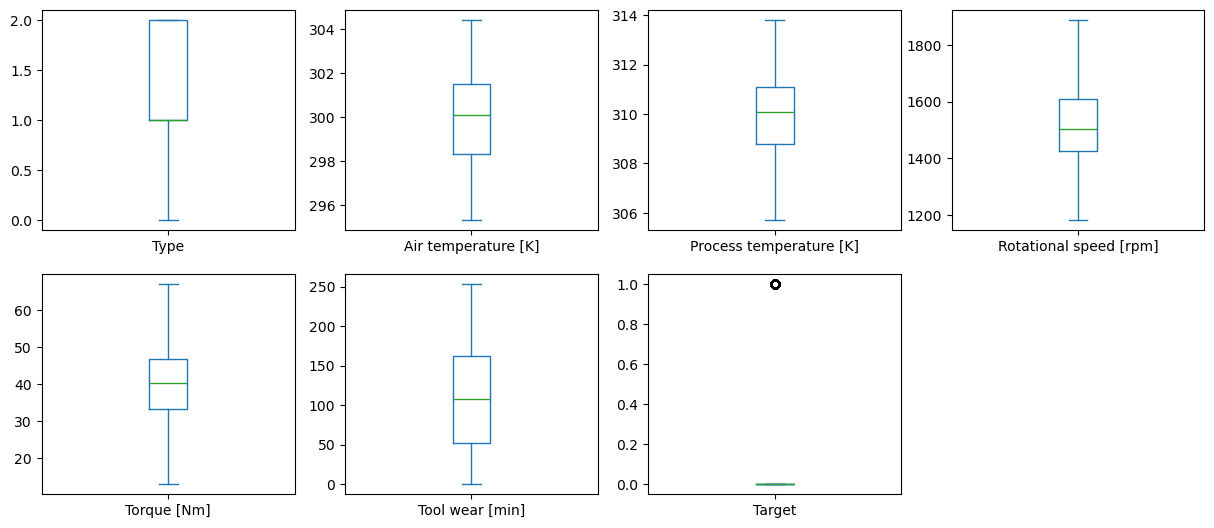

In [96]:
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)
plt.show()

In [97]:
X_test = X_test.drop('Target', axis=1)
X_train = X_train.drop('Target', axis=1)
X_val = X_val.drop('Target', axis=1)

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train the Random Forest model on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)  # You can tune parameters
rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Validation Accuracy: %.3f" % val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# If satisfied with validation performance, evaluate the model on the test set
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy: %.3f" % test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Validation Accuracy: 0.984
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.99      1.00      0.99      1938
           2       0.75      0.50      0.60        12
           3       0.93      0.72      0.81        18
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         9

    accuracy                           0.98      2000
   macro avg       0.60      0.48      0.53      2000
weighted avg       0.98      0.98      0.98      2000

Test Accuracy: 0.980
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.98      1.00      0.99      1935
           2       0.70      0.54      0.61        13
           3       0.79      0.75      0.77        20
           4       0.00      0.00      0.00         6
           5       1

e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: Undefine

In [ ]:
# X_train

In [99]:
import pickle

# Save the scaler
with open('scaler_forest.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the model
with open('svc_model_forest.pkl', 'wb') as f:
    pickle.dump(rf, f)
